In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

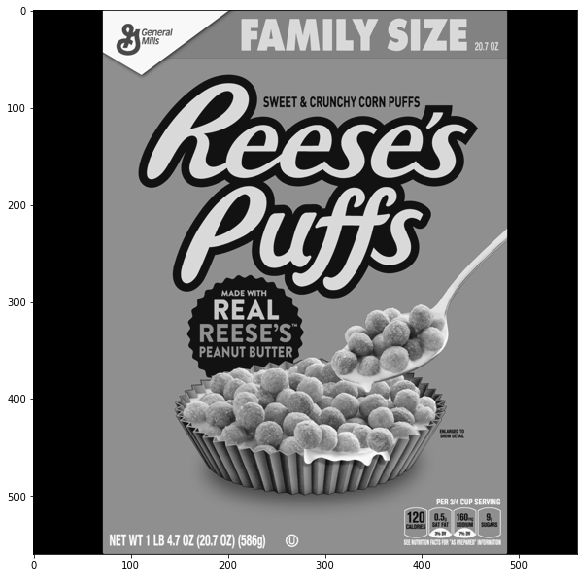

In [3]:
reeses = cv2.imread('../DATA/reeses_puffs.png',0)
display(reeses)

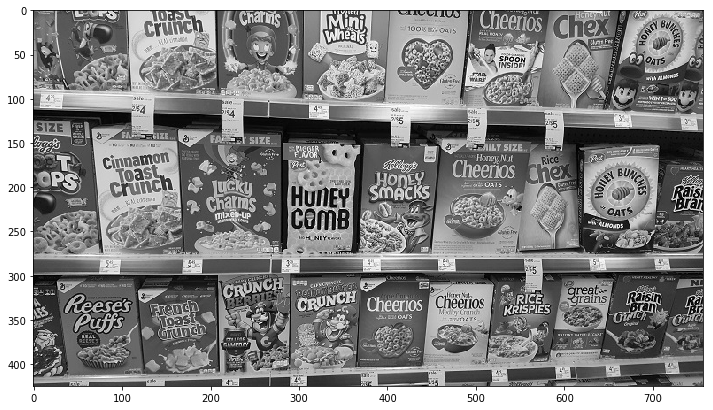

In [4]:
cereals = cv2.imread('../DATA/many_cereals.jpg',0)
display(cereals)

In [5]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

In [6]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key=lambda x:x.distance)

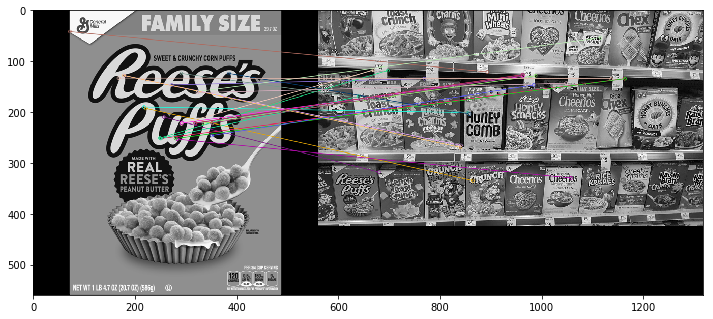

In [7]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_matches)

In [8]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [10]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
good = []
# Less distance == Better Match
# Ratio Match1 < 75% match 2
for match1,match2 in matches:
    # If match 1 distance is Less than 75% of Match 2 distance
    # then descriptor was a good match, let keep it
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

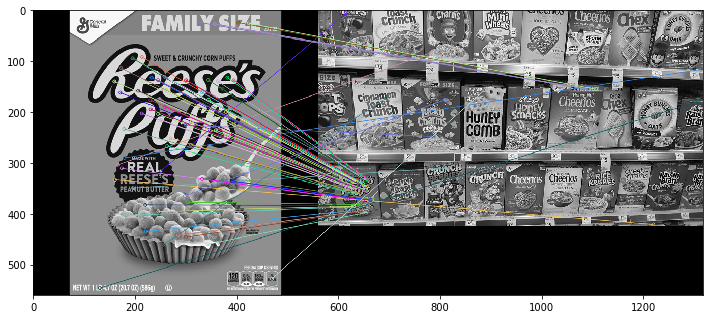

In [11]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches)

In [12]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [13]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [15]:
flann= cv2.FlannBasedMatcher()
matches = flann.knnMatch(des1,des2,k=2)
good = []
# Less distance == Better Match
# Ratio Match1 < 75% match 2
for match1,match2 in matches:
    # If match 1 distance is Less than 75% of Match 2 distance
    # then descriptor was a good match, let keep it
    if match1.distance < 0.7*match2.distance:
        good.append([match1])

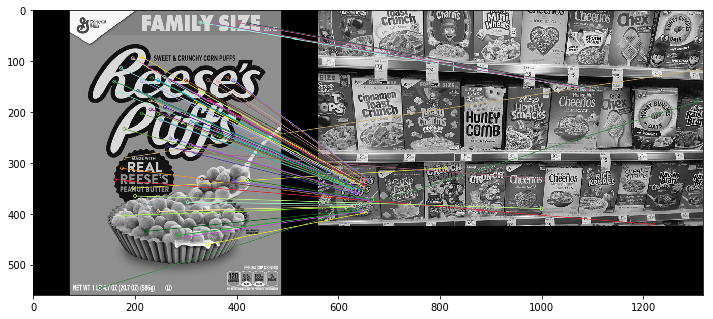

In [16]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(flann_matches)

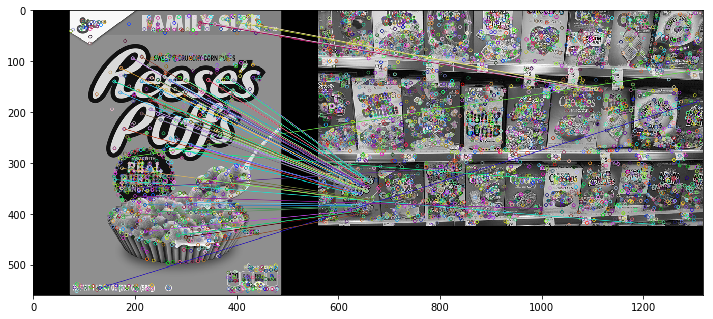

In [17]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)
display(flann_matches)

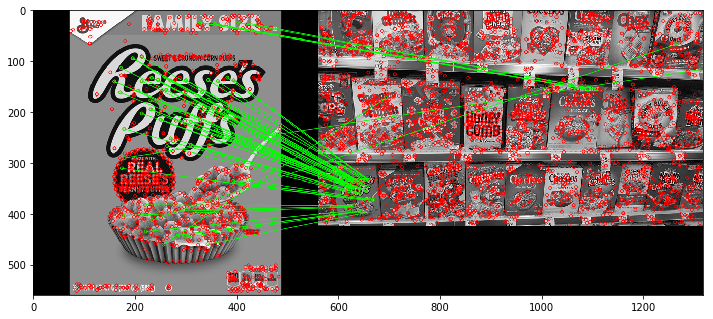

In [18]:
flann= cv2.FlannBasedMatcher()
matches = flann.knnMatch(des1,des2,k=2)
matchesMask = [[0,0] for i in range(len(matches))]
good = []
# Less distance == Better Match
# Ratio Match1 < 75% match 2
for i,(match1,match2) in enumerate(matches):
    # If match 1 distance is Less than 75% of Match 2 distance
    # then descriptor was a good match, let keep it
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]
draw_params = dict(matchColor=(0,255,0),singlePointColor=(255,0,0),matchesMask=matchesMask,flags=0)
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)

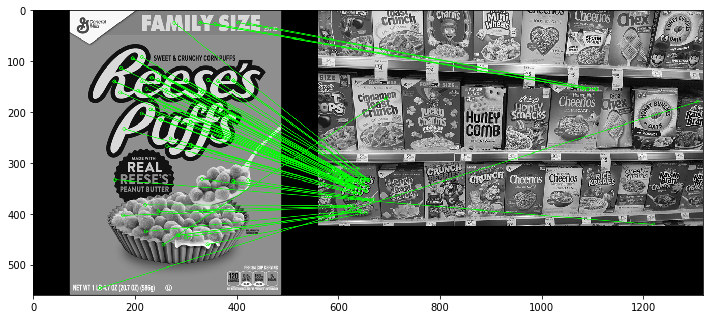

In [19]:
flann= cv2.FlannBasedMatcher()
matches = flann.knnMatch(des1,des2,k=2)
matchesMask = [[0,0] for i in range(len(matches))]
good = []
# Less distance == Better Match
# Ratio Match1 < 75% match 2
for i,(match1,match2) in enumerate(matches):
    # If match 1 distance is Less than 75% of Match 2 distance
    # then descriptor was a good match, let keep it
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]
draw_params = dict(matchColor=(0,255,0),singlePointColor=(255,0,0),matchesMask=matchesMask,flags=2)
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)